
# Recognizing hand-written digits with SVM

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import numpy as np

### Load the digits data set

#### 8x8 images of digits 

In [2]:
digits = datasets.load_digits()

In [3]:
# number of images? and its target?
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [4]:
digits['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

### Lets plot some of the images

Text(0.5,1,'Target is 1')

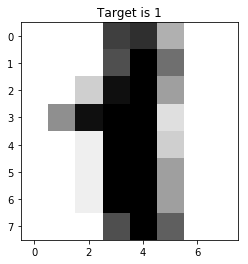

In [5]:
plt.imshow(digits['images'][1], cmap=plt.cm.gray_r)
plt.title("Target is {0}".format(digits['target'][1]))

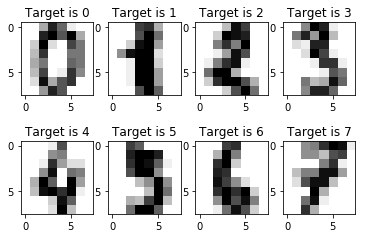

In [6]:
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.imshow(digits['images'][i-1], cmap=plt.cm.gray_r)
    plt.title("Target is {0}".format(digits['target'][i-1]))

In [7]:
print("-1 column reshaping", np.array([[2], [2]]).reshape(1, -1))
print("-1 row reshaping\n", np.array([[2, 2]]).reshape(-1, 1))

print("-----\n2x2 matrix in array reshaping")

a = np.array([[[2, 2], [2, 2]], [[3, 3], [3, 3]]])
print(a)
a.reshape(2, -1)

-1 column reshaping [[2 2]]
-1 row reshaping
 [[2]
 [2]]
-----
2x2 matrix in array reshaping
[[[2 2]
  [2 2]]

 [[3 3]
  [3 3]]]


array([[2, 2, 2, 2],
       [3, 3, 3, 3]])

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1) #convert 8x8 matrix into 1x64 matrix

In [9]:
classifier = svm.SVC(kernel='linear')

In [10]:
split_val = 1000
X_train, X_test = data[:split_val], data[split_val:]
Y_train, Y_test = digits.target[:split_val], digits.target[split_val:]

### Lets run the classifier

In [11]:
model = classifier.fit(X_train, Y_train)
obtained_Y = model.predict(X_test)

### Lets check the Metrics

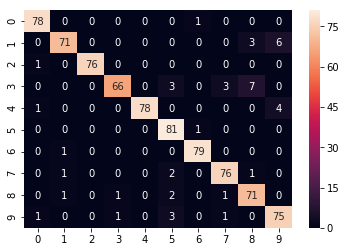

In [15]:
import seaborn as sb
sb.heatmap(metrics.confusion_matrix(Y_test, obtained_Y), annot=True)

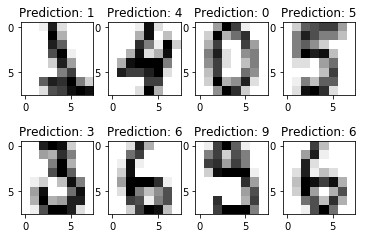

In [23]:
for i in range(0, 8):
    plt.subplot(2, 4, i+1)
    plt.imshow(digits['images'][i+1000], cmap=plt.cm.gray_r)
    plt.title('Prediction: %i' % obtained_Y[i])

plt.show()